In [113]:
from pyspark.sql import SparkSession
from pyspark.sql import types
from pyspark.sql.functions import isnull, col
import os
import time

Init Spark Session

In [53]:
spark = SparkSession.builder\
    .master("local[*]")\
    .appName('METAR Data')\
    .getOrCreate()

Read Data

In [54]:
schema = types.StructType([
    types.StructField('station', types.StringType(), True), 
    types.StructField('valid', types.TimestampType(), True), 
    types.StructField('lon', types.DoubleType(), True), 
    types.StructField('lat', types.DoubleType(), True), 
    types.StructField('elevation', types.DoubleType(), True), 
    types.StructField('tmpf', types.DoubleType(), True), 
    types.StructField('dwpf', types.DoubleType(), True), 
    types.StructField('relh', types.DoubleType(), True), 
    types.StructField('drct', types.DoubleType(), True), 
    types.StructField('sknt', types.DoubleType(), True), 
    types.StructField('p01i', types.DoubleType(), True), 
    types.StructField('alti', types.DoubleType(), True), 
    types.StructField('mslp', types.StringType(), True), 
    types.StructField('vsby', types.DoubleType(), True), 
    types.StructField('gust', types.IntegerType(), True), 
    types.StructField('skyc1', types.StringType(), True), 
    types.StructField('skyc2', types.StringType(), True), 
    types.StructField('skyc3', types.StringType(), True), 
    types.StructField('skyc4', types.StringType(), True), 
    types.StructField('skyl1', types.DoubleType(), True), 
    types.StructField('skyl2', types.DoubleType(), True), 
    types.StructField('skyl3', types.DoubleType(), True), 
    types.StructField('skyl4', types.DoubleType(), True), 
    types.StructField('wxcodes', types.StringType(), True), 
    types.StructField('ice_accretion_1hr', types.DoubleType(), True), 
    types.StructField('ice_accretion_3hr', types.DoubleType(), True), 
    types.StructField('ice_accretion_6hr', types.DoubleType(), True), 
    types.StructField('peak_wind_gust', types.DoubleType(), True), 
    types.StructField('peak_wind_drct', types.DoubleType(), True), 
    types.StructField('peak_wind_time', types.DoubleType(), True), 
    types.StructField('feel', types.DoubleType(), True), 
    types.StructField('metar', types.StringType(), True), 
    types.StructField('snowdepth', types.StringType(), True)
    ])


In [55]:
url_list = list()
for year in [*range(2000,2022)]:
    url_list.append(f'data/raw/EPWA/{year}/EPWA_01_01_{year}_31_12_{year}.csv')

url_list


['data/raw/EPWA/2000/EPWA_01_01_2000_31_12_2000.csv',
 'data/raw/EPWA/2001/EPWA_01_01_2001_31_12_2001.csv',
 'data/raw/EPWA/2002/EPWA_01_01_2002_31_12_2002.csv',
 'data/raw/EPWA/2003/EPWA_01_01_2003_31_12_2003.csv',
 'data/raw/EPWA/2004/EPWA_01_01_2004_31_12_2004.csv',
 'data/raw/EPWA/2005/EPWA_01_01_2005_31_12_2005.csv',
 'data/raw/EPWA/2006/EPWA_01_01_2006_31_12_2006.csv',
 'data/raw/EPWA/2007/EPWA_01_01_2007_31_12_2007.csv',
 'data/raw/EPWA/2008/EPWA_01_01_2008_31_12_2008.csv',
 'data/raw/EPWA/2009/EPWA_01_01_2009_31_12_2009.csv',
 'data/raw/EPWA/2010/EPWA_01_01_2010_31_12_2010.csv',
 'data/raw/EPWA/2011/EPWA_01_01_2011_31_12_2011.csv',
 'data/raw/EPWA/2012/EPWA_01_01_2012_31_12_2012.csv',
 'data/raw/EPWA/2013/EPWA_01_01_2013_31_12_2013.csv',
 'data/raw/EPWA/2014/EPWA_01_01_2014_31_12_2014.csv',
 'data/raw/EPWA/2015/EPWA_01_01_2015_31_12_2015.csv',
 'data/raw/EPWA/2016/EPWA_01_01_2016_31_12_2016.csv',
 'data/raw/EPWA/2017/EPWA_01_01_2017_31_12_2017.csv',
 'data/raw/EPWA/2018/EPWA_01

In [56]:
#station_df = spark.read\
#    .option("header","true")\
#    .schema(schema)\
#    .csv(url_list)

Load data to data/

In [108]:
pl_asos_network = ['EPBY','EPGD','EPKT','EPKK','EPLL','EPLB','EPPO','EPRA','EPRZ','EPSC','EPSY','EPMO','EPWA','EPWR','EPZG']

In [ ]:
os.popen('chmod +x load_data.sh')

for network in pl_asos_network:
    time.sleep(10)
    os.popen(f'sh ./load_data.sh {network} 2000 2022')

--2023-03-14 17:18:52--  https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=EPBY&data=all&year1=2000&month1=1&day1=1&year2=2000&month2=12&day2=31&tz=Etc%2FUTC&format=onlycomma&latlon=yes&elev=yes&missing=null&trace=T&direct=no&report_type=3&report_type=4
Translacja mesonet.agron.iastate.edu (mesonet.agron.iastate.edu)... 129.186.185.33
Łączenie się z mesonet.agron.iastate.edu (mesonet.agron.iastate.edu)|129.186.185.33|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: nieznana [text/plain]
Zapis do: `data/raw/EPBY/2000/EPBY_01_01_2000_31_12_2000.csv'

     0K                                                        30,8M=0s

2023-03-14 17:18:53 (30,8 MB/s) - zapisano `data/raw/EPBY/2000/EPBY_01_01_2000_31_12_2000.csv' [258]

--2023-03-14 17:19:02--  https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=EPGD&data=all&year1=2000&month1=1&day1=1&year2=2000&month2=12&day2=31&tz=Etc%2FUTC&format=onlycomma&latlon=yes&elev=yes&missing

--2023-03-14 17:21:12--  https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=EPZG&data=all&year1=2000&month1=1&day1=1&year2=2000&month2=12&day2=31&tz=Etc%2FUTC&format=onlycomma&latlon=yes&elev=yes&missing=null&trace=T&direct=no&report_type=3&report_type=4
Translacja mesonet.agron.iastate.edu (mesonet.agron.iastate.edu)... 129.186.185.33
Łączenie się z mesonet.agron.iastate.edu (mesonet.agron.iastate.edu)|129.186.185.33|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: nieznana [text/plain]
Zapis do: `data/raw/EPKK/2010/EPKK_01_01_2010_31_12_2010.csv'

     0K .......... .......... .......... .......... ..........  182K
    50K .......... .......... .......... .......... ..........  356K
   100K .......... .......... .......... .......... .......... 28,7M
   150K .......... .......... .......... .......... .......... 9,00M
   200K ...--2023-03-14 17:21:13--  https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=EPWR&data=all&y

Read all from data/

In [117]:
station_df = spark.read\
    .option("header","true")\
    .schema(schema)\
    .csv('data/raw/*/*/*')

In [120]:
station_df.count(), station_df.select(col('station')).distinct().show()

+-------+
|station|
+-------+
|   EPPO|
|   EPGD|
|   EPWA|
|   EPKK|
|   EPWR|
|   EPRZ|
|   EPLL|
|   EPSC|
|   EPKT|
|   EPBY|
|   EPSY|
|   EPMO|
|   EPLB|
|   EPRA|
|   EPZG|
+-------+



(3177152, None)

Check Schema

In [121]:
station_df.printSchema()

root
 |-- station: string (nullable = true)
 |-- valid: timestamp (nullable = true)
 |-- lon: double (nullable = true)
 |-- lat: double (nullable = true)
 |-- elevation: double (nullable = true)
 |-- tmpf: double (nullable = true)
 |-- dwpf: double (nullable = true)
 |-- relh: double (nullable = true)
 |-- drct: double (nullable = true)
 |-- sknt: double (nullable = true)
 |-- p01i: double (nullable = true)
 |-- alti: double (nullable = true)
 |-- mslp: string (nullable = true)
 |-- vsby: double (nullable = true)
 |-- gust: integer (nullable = true)
 |-- skyc1: string (nullable = true)
 |-- skyc2: string (nullable = true)
 |-- skyc3: string (nullable = true)
 |-- skyc4: string (nullable = true)
 |-- skyl1: double (nullable = true)
 |-- skyl2: double (nullable = true)
 |-- skyl3: double (nullable = true)
 |-- skyl4: double (nullable = true)
 |-- wxcodes: string (nullable = true)
 |-- ice_accretion_1hr: double (nullable = true)
 |-- ice_accretion_3hr: double (nullable = true)
 |-- ice_ac

In [139]:
station_df.show(5)

+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+
|station|              valid|  lon|    lat|elevation| tmpf| dwpf| relh|drct|sknt| alti|vsby| feel|
+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+
|   EPRZ|2010-01-01 00:00:00|22.02|50.1114|    202.0|30.38|30.38|100.0|80.0| 8.0|29.41| 1.5|22.12|
|   EPRZ|2010-01-01 00:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 01:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 01:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 02:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.35| 1.0| 30.2|
+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+
only showing top 5 rows



In [140]:
columns = ['station','valid','lon','lat','elevation','tmpf','dwpf','relh','drct','sknt','alti','vsby','feel']
station_df = station_df.select(columns)
station_df.show()

+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+
|station|              valid|  lon|    lat|elevation| tmpf| dwpf| relh|drct|sknt| alti|vsby| feel|
+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+
|   EPRZ|2010-01-01 00:00:00|22.02|50.1114|    202.0|30.38|30.38|100.0|80.0| 8.0|29.41| 1.5|22.12|
|   EPRZ|2010-01-01 00:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 01:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 01:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 02:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.35| 1.0| 30.2|
|   EPRZ|2010-01-01 02:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.32| 1.0| 30.2|
|   EPRZ|2010-01-01 03:00:00|22.02|50.1114|    202.0|30.92|30.92|100.0|80.0| 8.0|29.32| 1.0|22.78|
|   EPRZ|2

Replace all 'null' to None

In [141]:
station_df = station_df.na.replace('null',None)

Count rows with Null

In [63]:

#column = 'snowdepth'
#station_df.filter(col(column).isNull()).count()
#to replace: drct (6026), skyc1 (54828)



Replace Null

In [64]:
#station_df.select(col(column)).fillna('-',subset=[column])

Drop rows with Null

In [65]:
#station_df.na.drop(subset=[column])

In [130]:
#station_df.filter(col('dwpf').isNull()).count()

Drop column

In [67]:
#station_df = station_df.drop(column)

Replace None

In [68]:

#unique_val = station_df.select(column).distinct()
#unique_val.show()
#to drop

In [142]:
station_df.count()

3177152

Check

In [70]:
#station_df.select(column)

Dropna 

In [144]:
df = station_df.na.drop()
df.show(100)

+-------+-------------------+-----+-------+---------+-----+-----+-----+-----+----+-----+----+-----+
|station|              valid|  lon|    lat|elevation| tmpf| dwpf| relh| drct|sknt| alti|vsby| feel|
+-------+-------------------+-----+-------+---------+-----+-----+-----+-----+----+-----+----+-----+
|   EPRZ|2010-01-01 00:00:00|22.02|50.1114|    202.0|30.38|30.38|100.0| 80.0| 8.0|29.41| 1.5|22.12|
|   EPRZ|2010-01-01 00:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0|  0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 01:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0|  0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 01:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0|  0.0| 0.0|29.38| 1.0| 30.2|
|   EPRZ|2010-01-01 02:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0|  0.0| 0.0|29.35| 1.0| 30.2|
|   EPRZ|2010-01-01 02:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0|  0.0| 0.0|29.32| 1.0| 30.2|
|   EPRZ|2010-01-01 03:00:00|22.02|50.1114|    202.0|30.92|30.92|100.0| 80.0| 8.0|29.32| 1.0|22.78|


In [145]:
station_df.filter(col('dwpf').isNull()).count()

15748

In [146]:
station_df.count()

3177152

Regrasja liniowa

In [147]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [186]:
input_cols = ['dwpf','tmpf'] #'sknt','relh','alti','dwpf','tmpf','drct',

In [187]:
assembler = VectorAssembler(inputCols=input_cols, outputCol='features')
data = assembler.transform(df)
data.show(10)

+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+-------------+
|station|              valid|  lon|    lat|elevation| tmpf| dwpf| relh|drct|sknt| alti|vsby| feel|     features|
+-------+-------------------+-----+-------+---------+-----+-----+-----+----+----+-----+----+-----+-------------+
|   EPRZ|2010-01-01 00:00:00|22.02|50.1114|    202.0|30.38|30.38|100.0|80.0| 8.0|29.41| 1.5|22.12|[30.38,30.38]|
|   EPRZ|2010-01-01 00:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|  [30.2,30.2]|
|   EPRZ|2010-01-01 01:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|  [30.2,30.2]|
|   EPRZ|2010-01-01 01:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.38| 1.0| 30.2|  [30.2,30.2]|
|   EPRZ|2010-01-01 02:00:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.35| 1.0| 30.2|  [30.2,30.2]|
|   EPRZ|2010-01-01 02:30:00|22.02|50.1114|    202.0| 30.2| 30.2|100.0| 0.0| 0.0|29.32| 1.0| 30.

In [188]:
label_col = 'vsby'
data.select('features',label_col).show(10)

+-------------+----+
|     features|vsby|
+-------------+----+
|[30.38,30.38]| 1.5|
|  [30.2,30.2]| 1.0|
|  [30.2,30.2]| 1.0|
|  [30.2,30.2]| 1.0|
|  [30.2,30.2]| 1.0|
|  [30.2,30.2]| 1.0|
|[30.92,30.92]| 1.0|
|  [32.0,32.0]| 1.0|
|  [30.2,30.2]| 1.0|
|  [32.0,32.0]| 1.0|
+-------------+----+
only showing top 10 rows



In [189]:
train_data, test_data = data.randomSplit([0.7,0.3],seed=123)

In [190]:
lin_regression = LinearRegression(featuresCol="features",labelCol=label_col)
model = lin_regression.fit(train_data)

23/03/14 17:38:29 WARN Instrumentation: [ef7cd48d] regParam is zero, which might cause numerical instability and overfitting.


In [191]:
predictions = model.transform(test_data)

In [192]:
predictions.select("features", label_col, "prediction").show(500)

+-------------+----+------------------+
|     features|vsby|        prediction|
+-------------+----+------------------+
|  [19.4,21.2]| 3.0|4.4398969516605655|
|  [15.8,17.6]|1.25| 4.352555319026316|
|  [17.6,19.4]|1.25| 4.396226135343441|
|  [15.8,17.6]| 2.0| 4.352555319026316|
|  [15.8,17.6]| 3.0| 4.352555319026316|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [21.2,30.2]| 6.0|5.0969269636747825|
|  [21.2,30.2]| 7.0|5.0969269636747825|
|  [21.2,30.2]| 7.0|5.0969269636747825|
|  [21.2,30.2]| 7.0|5.0969269636747825|
|  [21.2,30.2]| 7.0|5.0969269636747825|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [19.4,28.4]| 7.0| 5.053256147357658|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [19.4,28.4]| 7.0| 5.053256147357658|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [21.2,28.4]| 7.0| 4.943587164750509|
|  [24.8,28.4]| 1.0| 4.724249199536213|
|  [24.8,28.4]| 1.0| 4.724249199536213|


R-kwadrat (R²): \
Metryka ta mierzy, jak wiele wariancji w zmiennej zależnej jest wyjaśniane przez nasz model. 
R² przyjmuje wartości od 0 do 1, gdzie 0 oznacza, że model nie wyjaśnia żadnej zmienności, a 1 oznacza, że model wyjaśnia całą zmienność.
Wyższe wartości R² oznaczają lepszą dopasowanie modelu.

In [193]:
from pyspark.ml.evaluation import RegressionEvaluator

In [194]:
evaluator = RegressionEvaluator(labelCol=label_col,
                                predictionCol="prediction",
                                metricName='r2')

In [195]:
r2 = evaluator.evaluate(predictions)

In [196]:
'R-squared on test data = %g' % r2

'R-squared on test data = 0.162246'

Plots

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
dataframe = predictions.select(label_col, "prediction").toPandas()
dataframe.head()

,vsby,prediction
0,3.00,4.439897
1,1.25,4.352555
2,1.25,4.396226
3,2.00,4.352555
4,3.00,4.352555


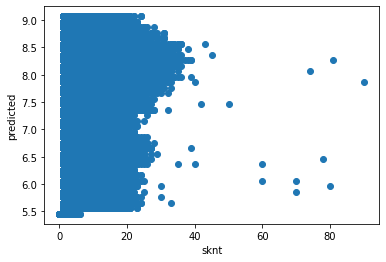

In [185]:
plt.scatter(dataframe[label_col], dataframe["prediction"])
plt.xlabel(label_col)
plt.ylabel("predicted")
plt.show()